<a href="https://colab.research.google.com/github/prateekk21/ipl-t20-cricket-analysis/blob/main/Prateek_Arora_IPL_T20_Cricket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Exploratory Data Analysis of IPL T20 Dataset from 2008 to 2019*
"*The IPL has taken the game to virtually every house in the world."*
--Sachin Tendulkar

*(Source: https://www.espncricinfo.com/magazine/content/quote/350779.html)*
</br>

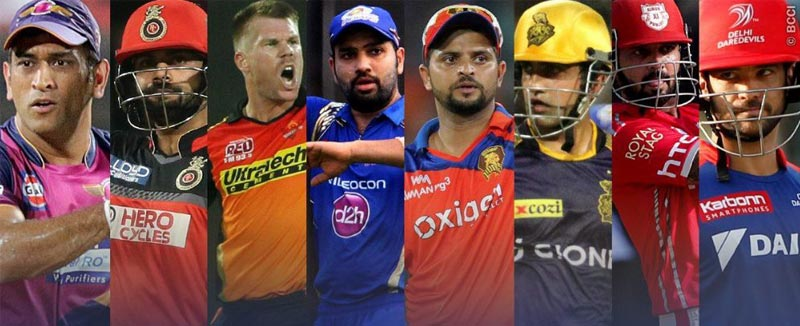
##<b>What is IPL?
### The Indian Premier League is a professional Twenty20 cricket league in India usually contested between March and May of every year by eight teams representing eight different cities or states in India. The league was founded by the Board of Control for Cricket in India in 2007. The IPL has an exclusive window in ICC Future Tours Programme.</b></br>

###<b>The IPL is the most-attended cricket league in the world and in 2014 was ranked sixth by average attendance among all sports leagues. In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube. The brand value of the IPL in 2019 was ₹475 billion (US$6.7 billion), according to Duff & Phelps. According to BCCI, the 2015 IPL season contributed ₹11.5 billion to the GDP of the Indian economy.</b>


*(Source: https://en.wikipedia.org/wiki/Indian_Premier_League)*






#Let's take a look at the problem statement

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

<br> Now lets start exploring the project


## The dataset consists of the following:


*   Players Data
*   List item
*   List item
*   Deliveries Data
*   Matches Data
*   Average Strikerate Data
*   Teamwise Home and Away Data

# Objectives:

*   To find the number of seasons in this dataset.
*   To find the number of matches in this dataset.
*   To check how many players are left handed and right handed.
*   To plot players as per their bowling skills.
*   To plot players as per their respective country.
*   To find top scorer batsmen.
*   To find which team won by maximum runs.
*   To find which team won by minimum runs.
*   To find which team won by maximum wickets.
*   To find which team won by minimum wickets.
*   To find top toss winners from all seasons.
*   To find the number of matches per season.
*   To find if toss winning helped in match winning.
*   To find the top 5 venues used for matches.
*   To find the top 5 cities where the maximum maches were held.
*   To find top 5 teams which won maximum number of times in all seasons. 
*   To find top 5 teams which has maximum home matches.
*   To find top 5 batsman who scored maximum sixes.
*   To find top 5 batsman who scored maximum fours.
*   To find top 5 players who got man of the match.
*   To find which team won the toss maximum times
*   To find the performance report of the top 3 teams





# Let's begin with importing required libraries

In [ ]:
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dir =  '/content/drive/MyDrive/AlmaBetter/Month 1/EDA/'

##So, here we are importing all the csv and xlsx files to start the analysis.

In [ ]:
players_df = pd.read_excel(dir + 'Players.xlsx')
deliveries_df = pd.read_csv(dir + 'deliveries.csv')
matches_df = pd.read_csv(dir+'matches.csv')
most_runs_df = pd.read_csv(dir+'most_runs_average_strikerate.csv')
teams_df = pd.read_csv(dir+'teams.csv')
teamwise_home_away_df = pd.read_csv(dir+'teamwise_home_and_away.csv')

## Let's start by printing the players dataframe

In [ ]:
players_df.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


##In this dataframe, Player details are given:

*   DOB: Shows the Date Of Birth of the player
*   Batting_Hand: Hand which is used by the player while batting.
*   Bowling_Skill: Type of skill the player has
*   Country: Shows the name of country to which the player belongs.



# Let's check how many players are left handed and right handed

In [ ]:
players_df['Batting_Hand'].value_counts()

Right_Hand    373
Left_Hand     142
Right_hand     48
Name: Batting_Hand, dtype: int64

## As we can see here, we have two values for right hand. So we have to replace the Right_hand to Right_Hand.
### We can do it by using the replace method.

In [ ]:
players_df['Batting_Hand'].replace('Right_hand', 'Right_Hand', inplace=True)

In [ ]:
players_df['Batting_Hand'].value_counts().reset_index()

,index,Batting_Hand
0,Right_Hand,421
1,Left_Hand,142


## Let's find out the percentage of both right and left hand players 

In [ ]:
Right_Hand_percentage = players_df['Batting_Hand'].value_counts().reset_index()['Batting_Hand'][0]*100/sum(players_df['Batting_Hand'].value_counts().reset_index()['Batting_Hand'])
Left_Hand_percentage = players_df['Batting_Hand'].value_counts().reset_index()['Batting_Hand'][1]*100/sum(players_df['Batting_Hand'].value_counts().reset_index()['Batting_Hand'])

In [ ]:
print(f'Right hand players percentage is {Right_Hand_percentage} and left hand players percentage is {Left_Hand_percentage}')

Right hand players percentage is 74.77797513321492 and left hand players percentage is 25.22202486678508


## We can plot the above information using seaborn.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


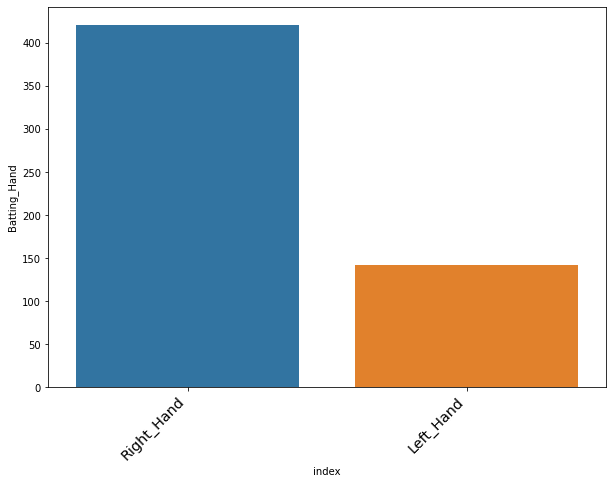

In [ ]:
plt.figure(figsize=(10,7))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot('index', 'Batting_Hand', data=players_df['Batting_Hand'].value_counts().reset_index())

##Observation: 74.8% of batsmen are Right Handed and 25.2% of batsmen are Left Handed

# Let's try to plot the graph of bowling skills.

In [ ]:
players_df['Bowling_Skill'].value_counts().reset_index()

,index,Bowling_Skill
0,Right-arm medium,107
1,Right-arm offbreak,91
2,Right-arm fast-medium,68
3,Slow left-arm orthodox,50
4,Right-arm fast,39
5,Right-arm medium-fast,38
6,Legbreak,30
7,Legbreak googly,28
8,Left-arm fast-medium,19
9,Left-arm medium,11


### Let's plot the above information in a graphical manner.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


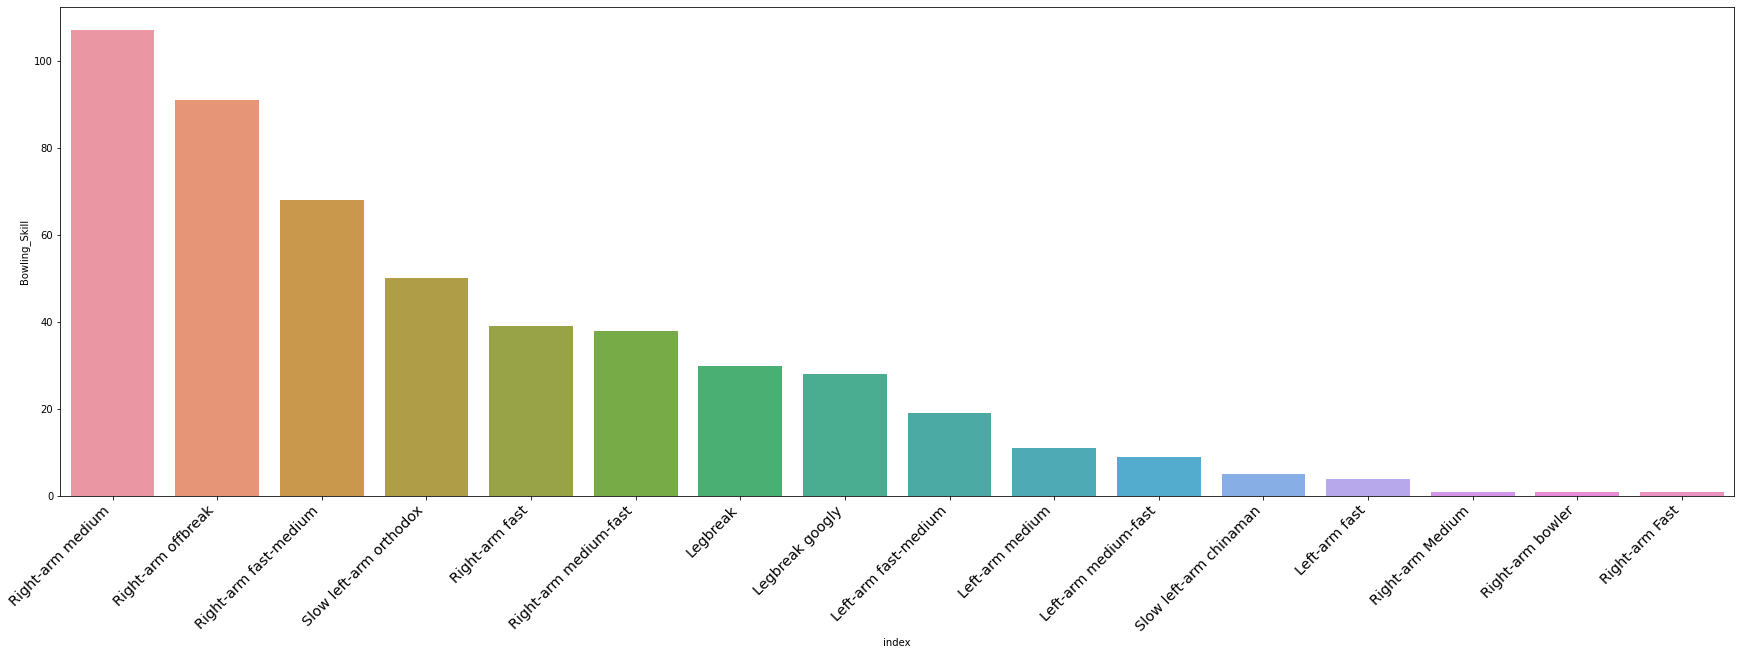

In [ ]:
plt.figure(figsize=(30,9))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot('index', 'Bowling_Skill', data=players_df['Bowling_Skill'].value_counts().reset_index())

##Observation: maximum number of players have Right-arm medium skill

# Let's check maximum players are from which country

In [ ]:
players_df['Country'].value_counts().reset_index()

,index,Country
0,India,264
1,Australia,72
2,South Africa,39
3,New Zealand,22
4,Sri Lanka,20
5,West Indies,19
6,England,14
7,Pakistan,13
8,Bangladesh,5
9,Zimbabwea,2


### Let's plot the above information on graph

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


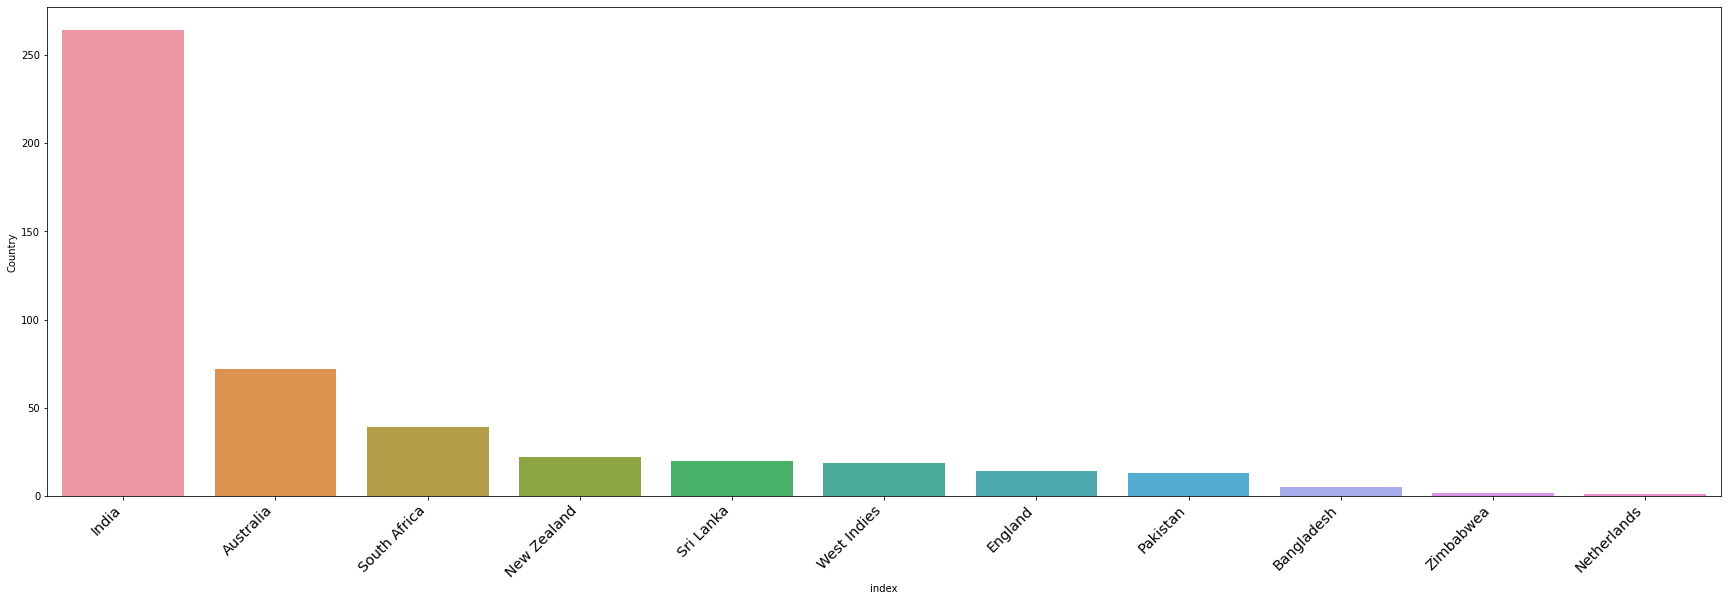

In [ ]:
plt.figure(figsize=(30,9))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot('index', 'Country', data=players_df['Country'].value_counts().reset_index())

##Observation: Maximum players are from india which is pretty obvious.

##Let's print the deliveries dataframe for further anaysis.

In [ ]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


# Now, we will check which player had scored maximum runs in all matches.

### Here we will apply the groupby method to sum up all the scores for each batsman

In [ ]:
deliveries_df_1 = deliveries_df.groupby('batsman').agg({'batsman_runs': sum}).reset_index()

In [ ]:
deliveries_df_1.sort_values(by=['batsman_runs'], ascending=False, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


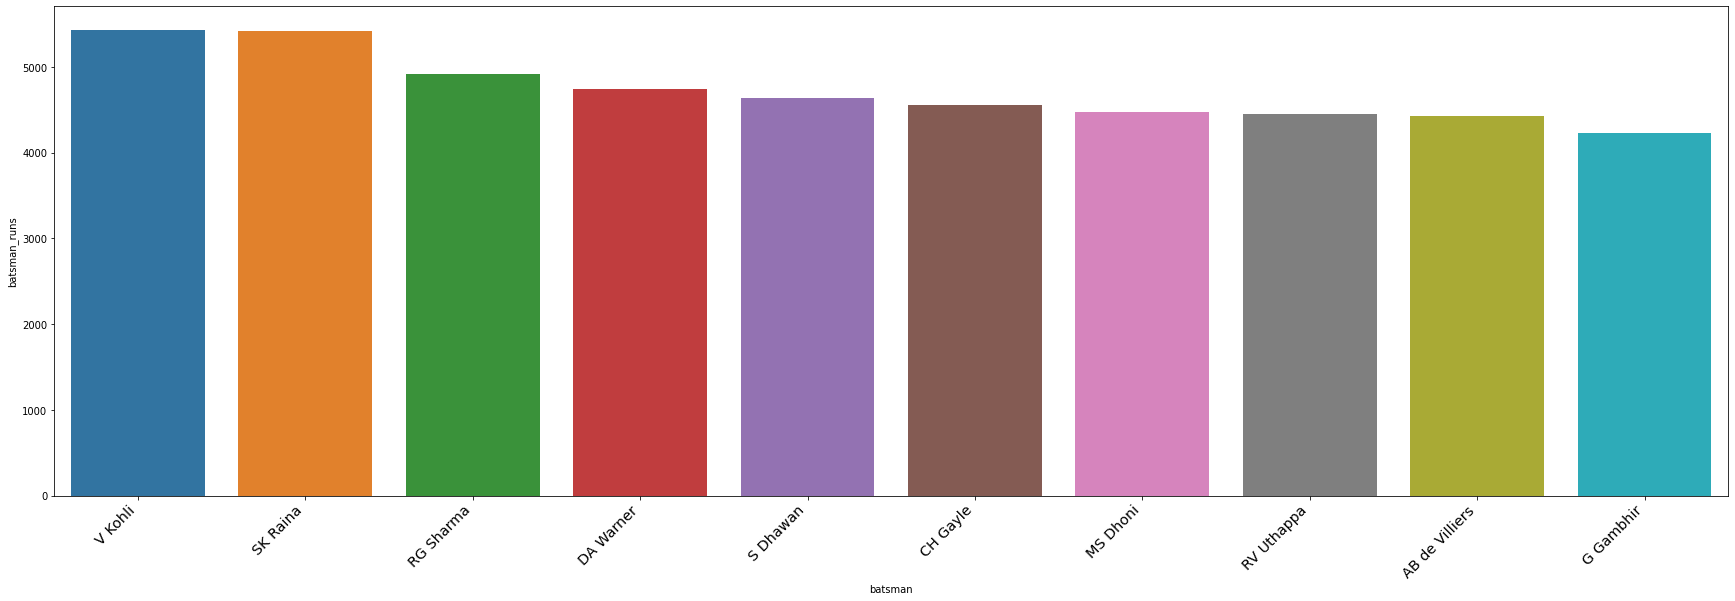

In [ ]:
plt.figure(figsize=(30,9))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot('batsman', 'batsman_runs', data=deliveries_df_1.head(10))

##Observation: Virat Kohli is the highest scorer batsman.

# Let's check how many matches we have in this dataset

In [ ]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
len(matches_df['id'])

756

##Observation: We have 756 matches in this dataset

# Let's check how many seasons we have in this dataset

In [ ]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
len(matches_df['Season'].unique())

12

##Observation: There are 12 seasons in this dataset. 2008 to 2019

# Let's check which team won by maximum runs

In [ ]:
matches_df1 = matches_df.sort_values(by=['win_by_runs'], ascending = False).reset_index()

### We can use the sort_values method to sort the 'win by runs' column in descending manner to get the maximum runs.

In [ ]:
matches_df1.head()

,index,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,43,44,IPL-2017,Delhi,06-05-2017,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
1,619,620,IPL-2016,Bangalore,14-05-2016,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma,NaN
2,59,60,IPL-2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
3,556,557,IPL-2015,Bangalore,06-05-2015,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,138,0,CH Gayle,M Chinnaswamy Stadium,RK Illingworth,VA Kulkarni,NaN
4,410,411,IPL-2013,Bangalore,23-04-2013,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,normal,0,Royal Challengers Bangalore,130,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,C Shamshuddin,NaN


In [ ]:
matches_df1['winner'][matches_df['win_by_runs'].idxmax()]

'Mumbai Indians'

## Observation: Mumbai Indians has won by maximum runs

# Let's check which team won by maximum wickets

In [ ]:
matches_df2 = matches_df.sort_values(by=['win_by_wickets'], ascending = False).reset_index()

In [ ]:
matches_df['winner'][matches_df['win_by_wickets'].idxmax()]

'Kolkata Knight Riders'

## Observation: Kolkata Knight Riders has won by maximum wickets

#Let's check which team won by closest margin (min runs)

### We can use the idxmax method to fetch the max index from the specific column.

In [ ]:
matches_df3 = matches_df[matches_df['win_by_runs']==1]
matches_df3['winner'][matches_df3['win_by_runs'].idxmax()]

'Mumbai Indians'

## Observation: Mumbai Indians has won by minimum runs

# Which team won by min wickets

In [ ]:
matches_df4 = matches_df[matches_df['win_by_wickets']==1]
matches_df4['winner'][matches_df4['win_by_wickets'].idxmax()]

'Kolkata Knight Riders'

## Observation: Kolkata Knight Riders has won by minimum wickets

#Let's plot the number of matches per season

### We will use the value_counts method to print the number of matches per season

In [ ]:
matches_df['Season'].value_counts().reset_index()

,index,Season
0,IPL-2013,76
1,IPL-2012,74
2,IPL-2011,73
3,IPL-2010,60
4,IPL-2016,60
5,IPL-2019,60
6,IPL-2018,60
7,IPL-2014,60
8,IPL-2017,59
9,IPL-2015,59


### Here, we will insert a new column named 'Season_year' which will fetch the year from Season column.

In [ ]:
matches_df['Season_year'] = matches_df['Season'].apply(lambda x: x[-4:])

In [ ]:
matches_df_2 = matches_df['Season_year'].value_counts().reset_index()

In [ ]:
matches_df_2.sort_values(by=['index'])

,index,Season_year
10,2008,58
11,2009,57
6,2010,60
2,2011,73
1,2012,74
0,2013,76
7,2014,60
9,2015,59
5,2016,60
8,2017,59


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


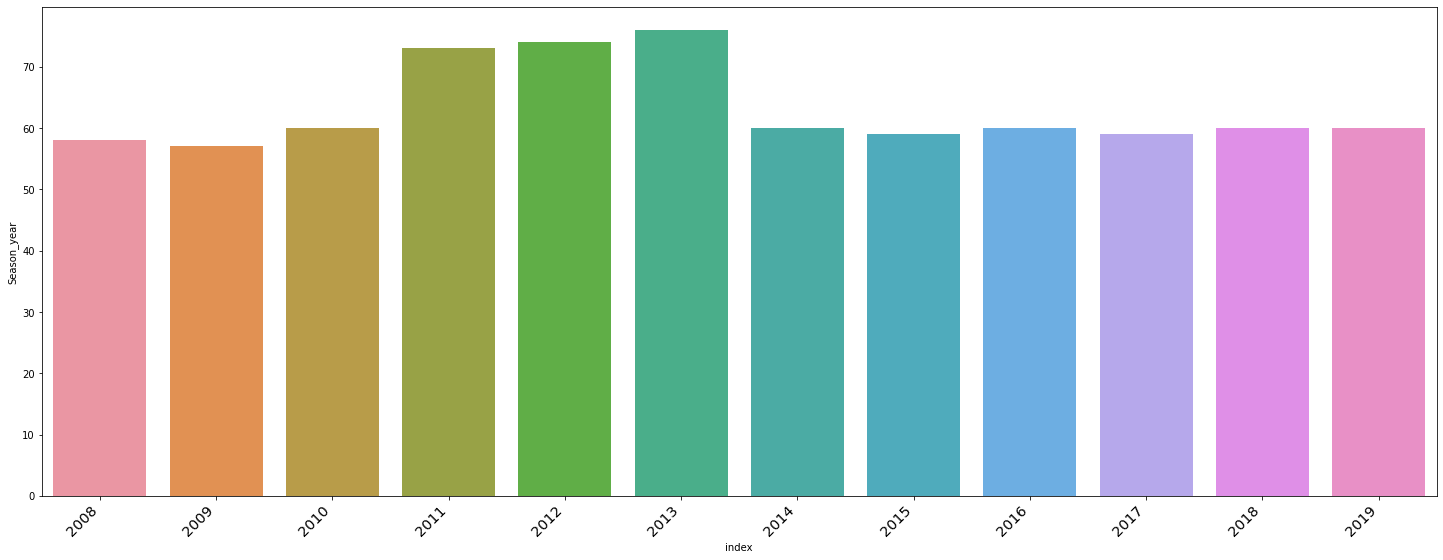

In [ ]:
plt.figure(figsize=(25,9))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot('index', 'Season_year', data=matches_df_2.sort_values(by=['index']))

##Observation: In 2013, we had maximum number of matches.

# Let's find out whether toss winning helped the team in winning the match.

In [ ]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,Season_year
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,2017
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2017
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,2017
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,2017
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,2017


###We will create a new column which will have boolean values. True if the team won the match after winning toss and False if Team lost the match after winning the toss.

In [ ]:
matches_df['won_after_winning_toss'] = matches_df['toss_winner']==matches_df['winner']

In [ ]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,Season_year,won_after_winning_toss
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,2017,False
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2017,True
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,2017,True
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,2017,True
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,2017,True


In [ ]:
matches_df['won_after_winning_toss'].value_counts().reset_index()

,index,won_after_winning_toss
0,True,393
1,False,363


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


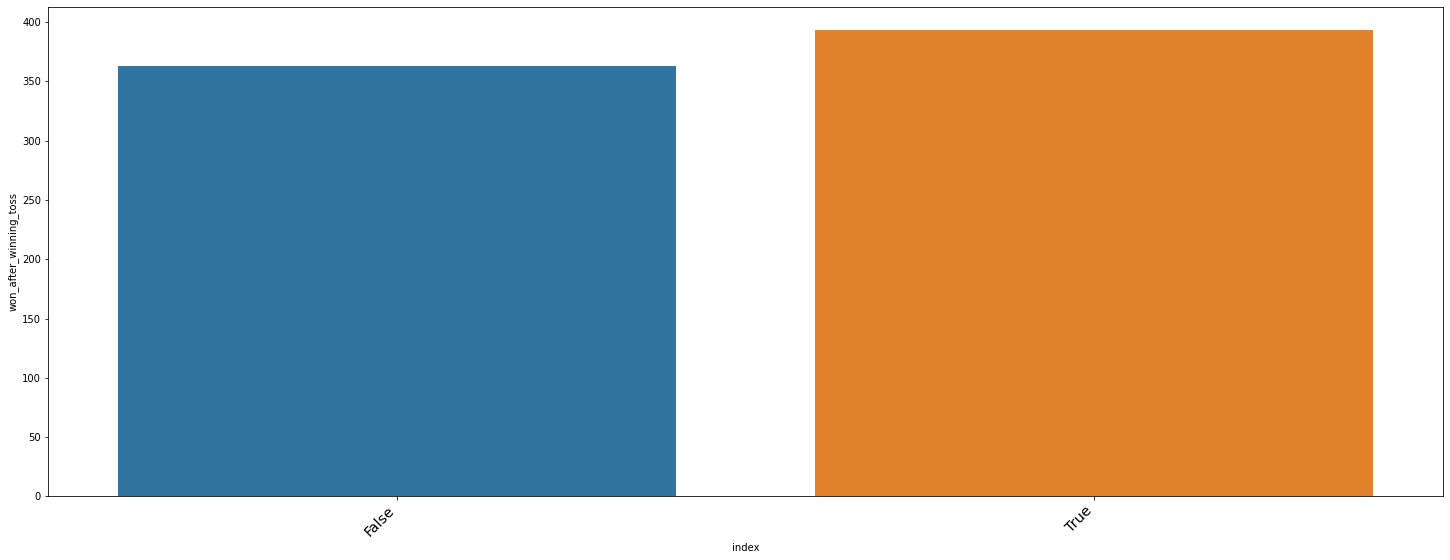

In [ ]:
plt.figure(figsize=(25,9))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot('index', 'won_after_winning_toss', data=matches_df['won_after_winning_toss'].value_counts().reset_index())

##Observation: Toss winning does not helps much in winning the match.

# Let's plot the top 10 Venues used for matches

### Firstly, we will create a table using value_counts. 

In [ ]:
matches_df['venue'].value_counts().reset_index()

,index,venue
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


### Now we will plot the above table in bar graph

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


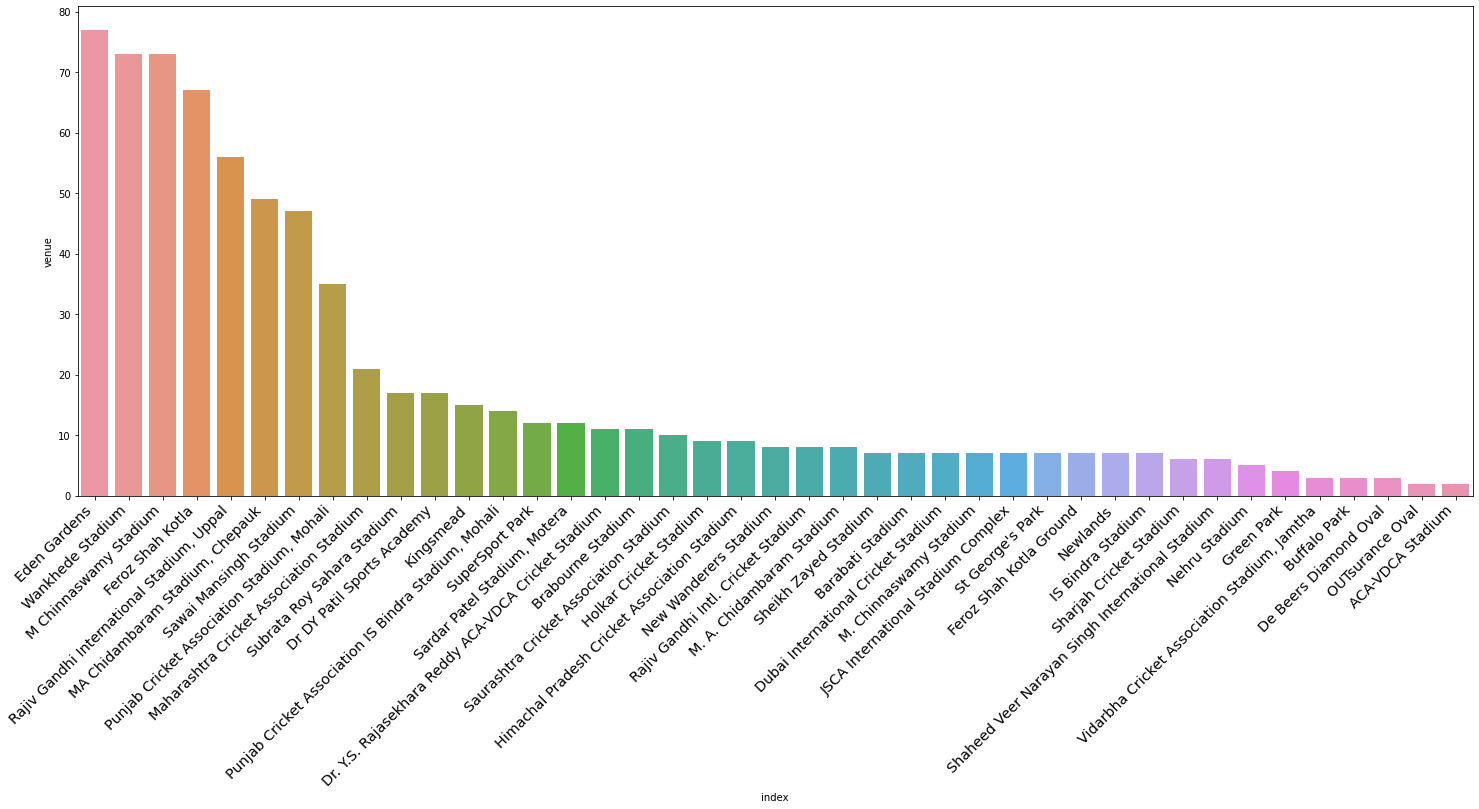

In [ ]:
plt.figure(figsize=(25,9))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot('index', 'venue', data=matches_df['venue'].value_counts().reset_index())

##Observation: Eden Gardens is the most used stadium for IPL matches and Till now IPL matches were hosted by 40 venues.

# Let's find the top Cities in which matches got conducted

In [ ]:
matches_df['city'].value_counts().reset_index()

,index,city
0,Mumbai,101
1,Kolkata,77
2,Delhi,74
3,Bangalore,66
4,Hyderabad,64
5,Chennai,57
6,Jaipur,47
7,Chandigarh,46
8,Pune,38
9,Durban,15


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


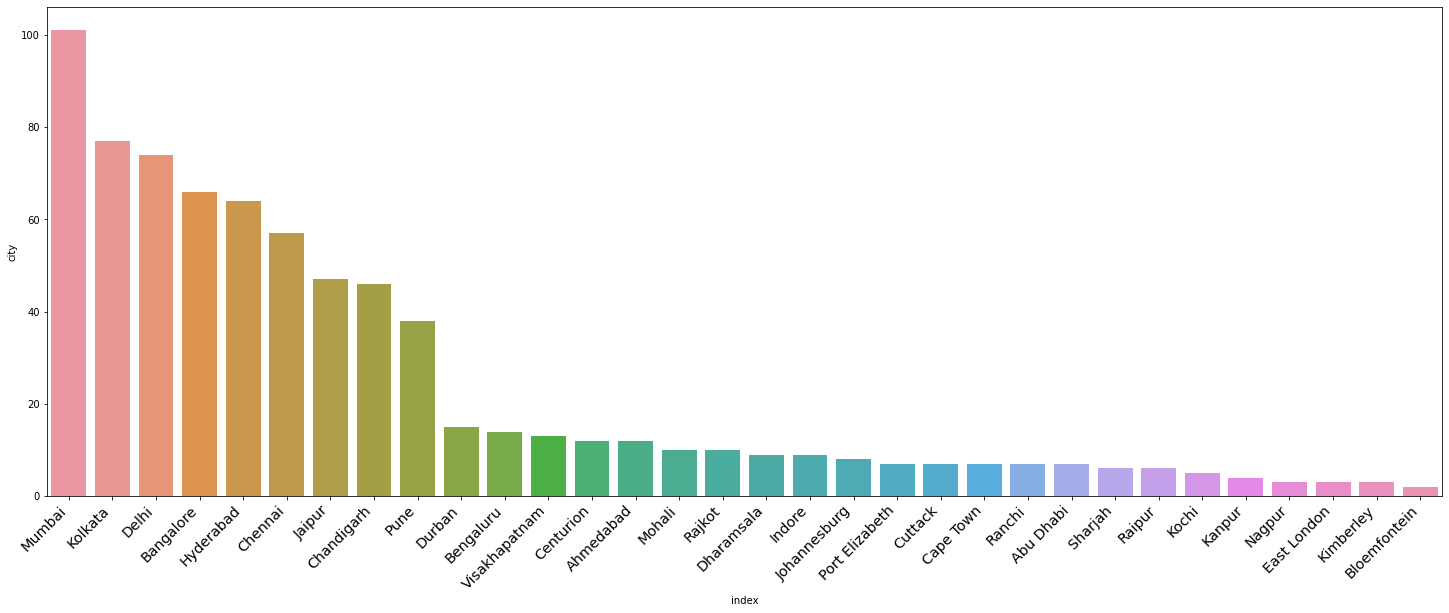

In [ ]:
plt.figure(figsize=(25,9))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot('index', 'city', data=matches_df['city'].value_counts().reset_index())

## Observation: Maximum number of matches were held in Mumbai

#Let's find the top Teams which won maximum number of times in all seasons

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'No. of Matches'), Text(0.5, 0, 'Team')]

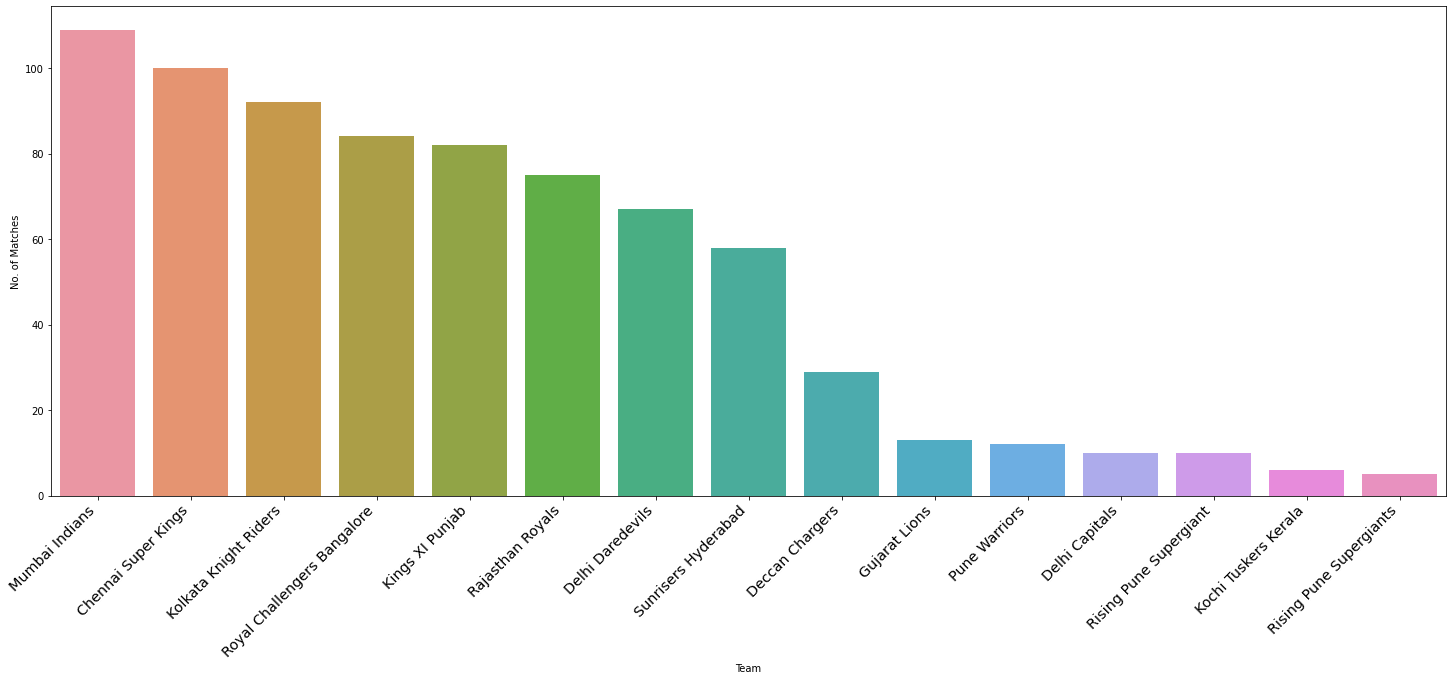

In [ ]:
plt.figure(figsize=(25,9))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot('index', 'winner', data=matches_df['winner'].value_counts().reset_index()).set(xlabel="Team", ylabel = "No. of Matches")

##Observation: Mumbai Indians Won most number of matches in this dataset

# Let's find which team had maximum number of home matches



In [ ]:
teamwise_home_away_df.head()

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222


In [ ]:
teamwise_home_away_df.sort_values(by=['home_matches'], ascending=False).reset_index()

,index,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,1,Mumbai Indians,58,51,101,86,57.425743,59.302326
1,7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
2,2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
4,9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632
5,10,Delhi Daredevils,25,42,72,89,34.722222,47.191011
6,5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
7,4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
8,6,Deccan Chargers,18,11,43,32,41.860465,34.375000
9,11,Pune Warriors,6,6,20,26,30.000000,23.076923


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


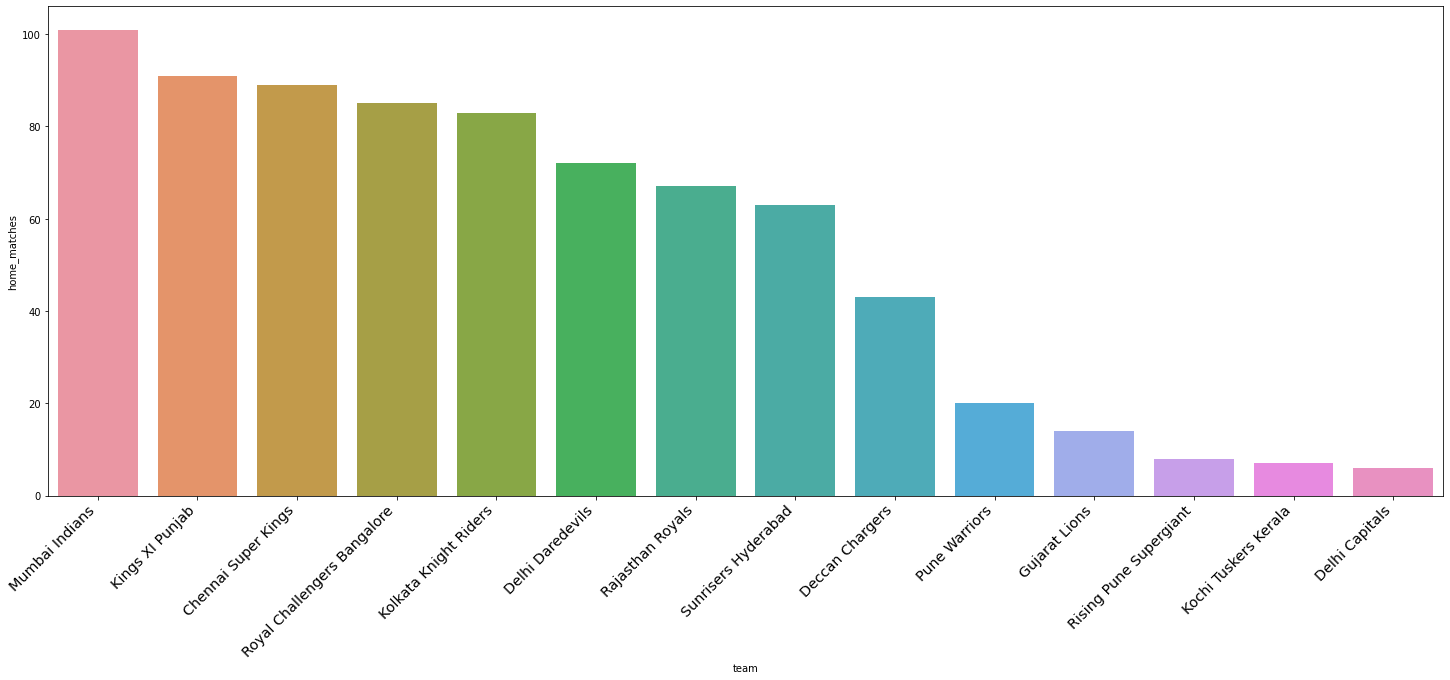

In [ ]:
plt.figure(figsize=(25,9))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot('team', 'home_matches', data=teamwise_home_away_df.sort_values(by=['home_matches'], ascending=False).reset_index())

##Observation: Mumbai Indians played most number of home matches

# Let's find the batsman who scored max sixes

In [ ]:
deliveries_df_6 = deliveries_df[deliveries_df['batsman_runs']==6]

In [ ]:
deliveries_df_6 = deliveries_df_6.groupby('batsman').agg({'batsman_runs':sum}).reset_index()

In [ ]:
deliveries_df_6['no. of sixes'] = deliveries_df_6['batsman_runs'].apply(lambda x: x/6)

In [ ]:
deliveries_df_6.head()

,batsman,batsman_runs,no. of sixes
59,CH Gayle,1962,327.0
12,AB de Villiers,1284,214.0
193,MS Dhoni,1242,207.0
278,SK Raina,1170,195.0
240,RG Sharma,1164,194.0


In [ ]:
deliveries_df_6.sort_values(by=['no. of sixes'], ascending=False, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


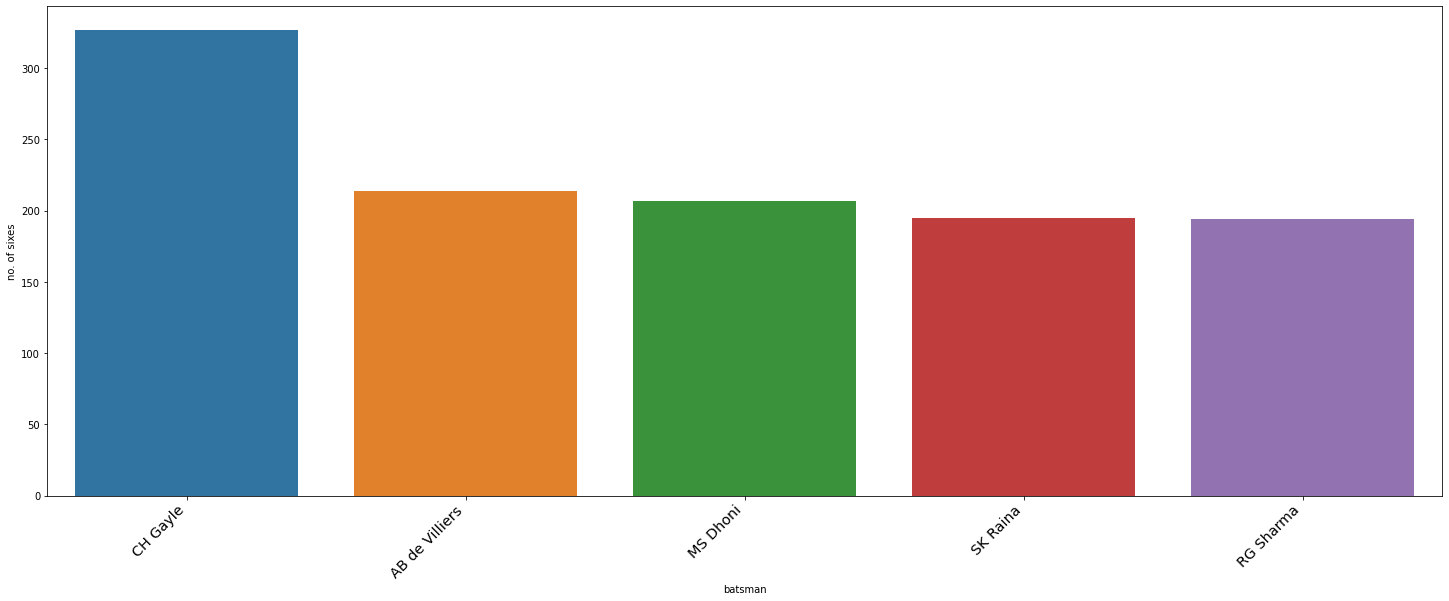

In [ ]:
plt.figure(figsize=(25,9))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot('batsman', 'no. of sixes', data=deliveries_df_6.head())

##Observation: Chris Gayle has scored most number of sixes.

# Let's find the batsman who scored max fours

In [ ]:
deliveries_df_4 = deliveries_df[deliveries_df['batsman_runs']==4]
deliveries_df_4 = deliveries_df_4.groupby('batsman').agg({'batsman_runs':sum}).reset_index()
deliveries_df_4['no. of fours'] = deliveries_df_4['batsman_runs'].apply(lambda x: x/4)
deliveries_df_4.sort_values(by=['no. of fours'], ascending=False, inplace=True)

In [ ]:
deliveries_df_4.head()

,batsman,batsman_runs,no. of fours
317,S Dhawan,2104,526.0
343,SK Raina,1980,495.0
120,G Gambhir,1968,492.0
387,V Kohli,1928,482.0
89,DA Warner,1836,459.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


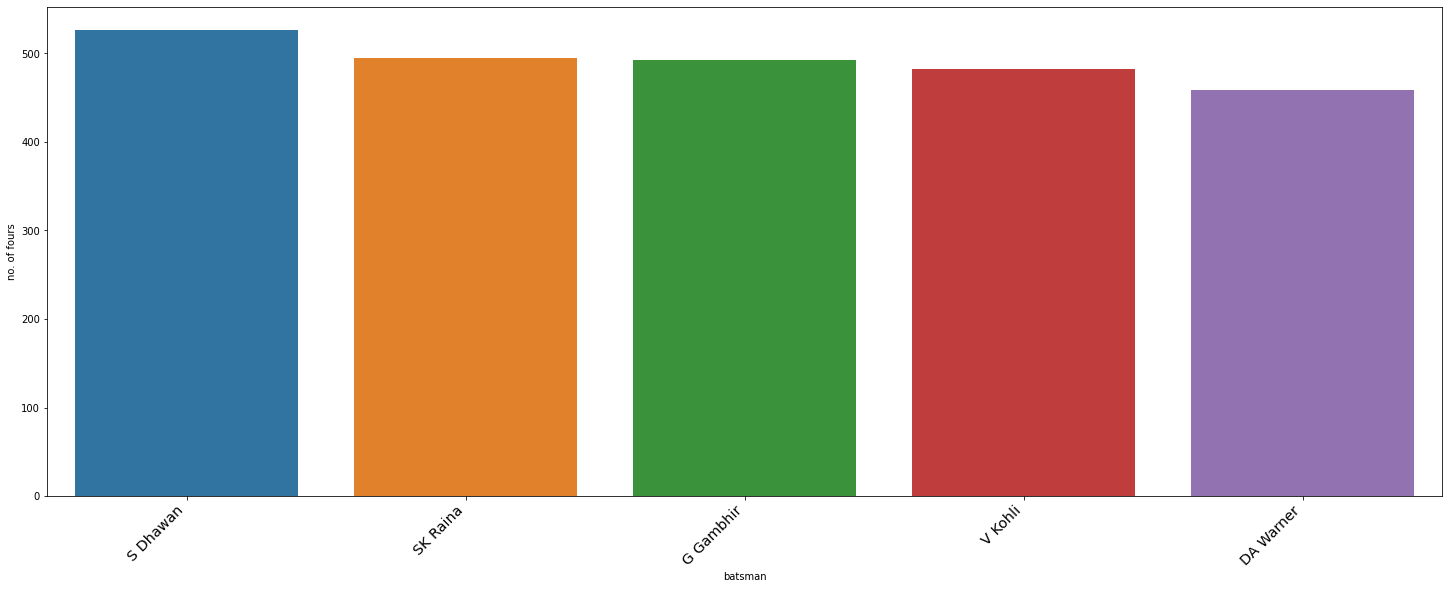

In [ ]:
plt.figure(figsize=(25,9))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot('batsman', 'no. of fours', data=deliveries_df_4.head())

## Observation: Shikhar Dhawan scored maximum number of fours.

#Let's find out which player won Player of the match maximum number of times

In [ ]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,Season_year,won_after_winning_toss
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,2017,False
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2017,True
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,2017,True
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,2017,True
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,2017,True


In [ ]:
matches_df['player_of_match'].value_counts().reset_index()

,index,player_of_match
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,DA Warner,17
4,RG Sharma,17
...,...,...
221,Umar Gul,1
222,S Badrinath,1
223,AD Mathews,1
224,TM Dilshan,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


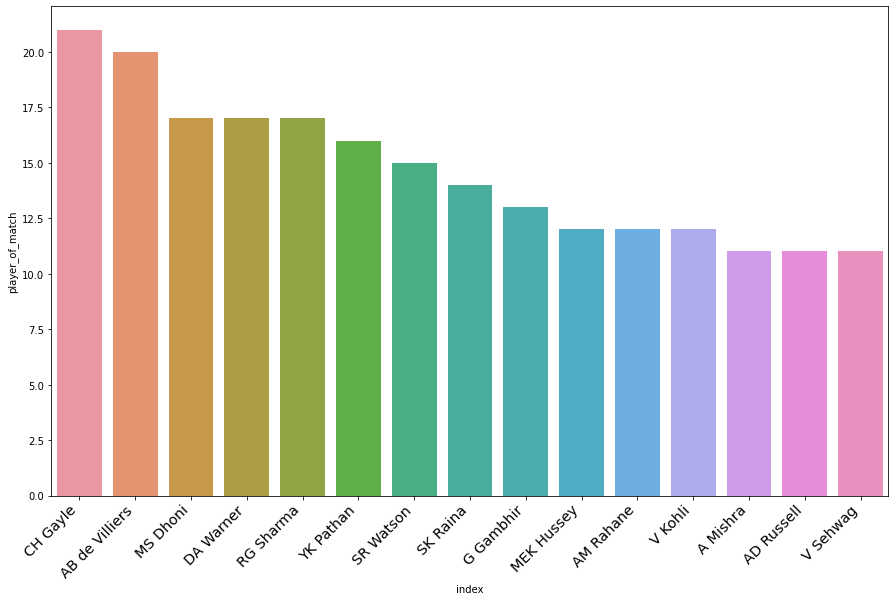

In [ ]:
plt.figure(figsize=(15,9))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot('index', 'player_of_match', data=matches_df['player_of_match'].value_counts().reset_index().head(15))

##Observation: Chris Gayle won Player of the match maximum number of times followed by AB de Villiers

#Let's find out which team won the toss maximum times.

In [ ]:
matches_df['toss_winner'].value_counts().reset_index()

,index,toss_winner
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Kings XI Punjab,81
4,Royal Challengers Bangalore,81
5,Rajasthan Royals,80
6,Delhi Daredevils,80
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


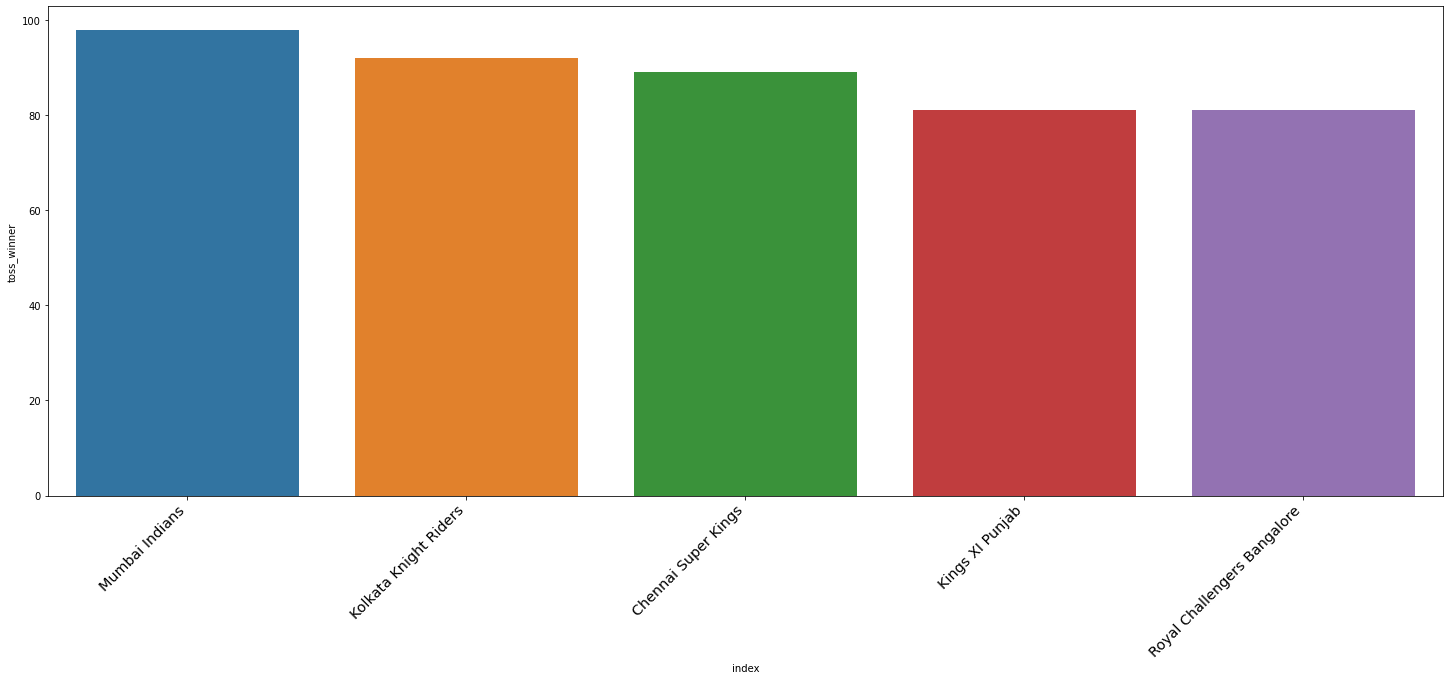

In [ ]:
plt.figure(figsize=(25,9))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot('index', 'toss_winner', data=matches_df['toss_winner'].value_counts().reset_index().head())

##Observation: Mumbai Indians won the toss maximum times.

# Top 3 Teams performance report in every season 

In [ ]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
matches_df['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

###Let's get rid of null values from winner column

In [ ]:
matches_df = matches_df[~matches_df['winner'].isna()]

In [ ]:
matches_df_win = matches_df[(matches_df['winner']=='Mumbai Indians')  | (matches_df['winner']=='Chennai Super Kings') | (matches_df['winner']=='Kolkata Knight Riders') ]

In [ ]:
matches_df_win_1 = matches_df_win.groupby('Season_year').agg({'winner':Counter}).reset_index()

In [ ]:
matches_df_win_1.head()

,Season_year,winner
0,2008,"{'Kolkata Knight Riders': 6, 'Chennai Super Ki..."
1,2009,"{'Mumbai Indians': 5, 'Chennai Super Kings': 8..."
2,2010,"{'Kolkata Knight Riders': 7, 'Mumbai Indians':..."
3,2011,"{'Chennai Super Kings': 11, 'Mumbai Indians': ..."
4,2012,"{'Mumbai Indians': 10, 'Chennai Super Kings': ..."


In [ ]:
matches_df_win_1['winner'][0]

Counter({'Chennai Super Kings': 9,
         'Kolkata Knight Riders': 6,
         'Mumbai Indians': 7})

In [ ]:
matches_df_win_2 = matches_df_win_1.join(pd.json_normalize(matches_df_win_1['winner']))

In [ ]:
matches_df_win_2.head()

,Season_year,winner,Kolkata Knight Riders,Chennai Super Kings,Mumbai Indians
0,2008,"{'Kolkata Knight Riders': 6, 'Chennai Super Ki...",6,9.0,7
1,2009,"{'Mumbai Indians': 5, 'Chennai Super Kings': 8...",3,8.0,5
2,2010,"{'Kolkata Knight Riders': 7, 'Mumbai Indians':...",7,9.0,11
3,2011,"{'Chennai Super Kings': 11, 'Mumbai Indians': ...",8,11.0,10
4,2012,"{'Mumbai Indians': 10, 'Chennai Super Kings': ...",12,10.0,10


In [ ]:
del matches_df_win_2['winner']

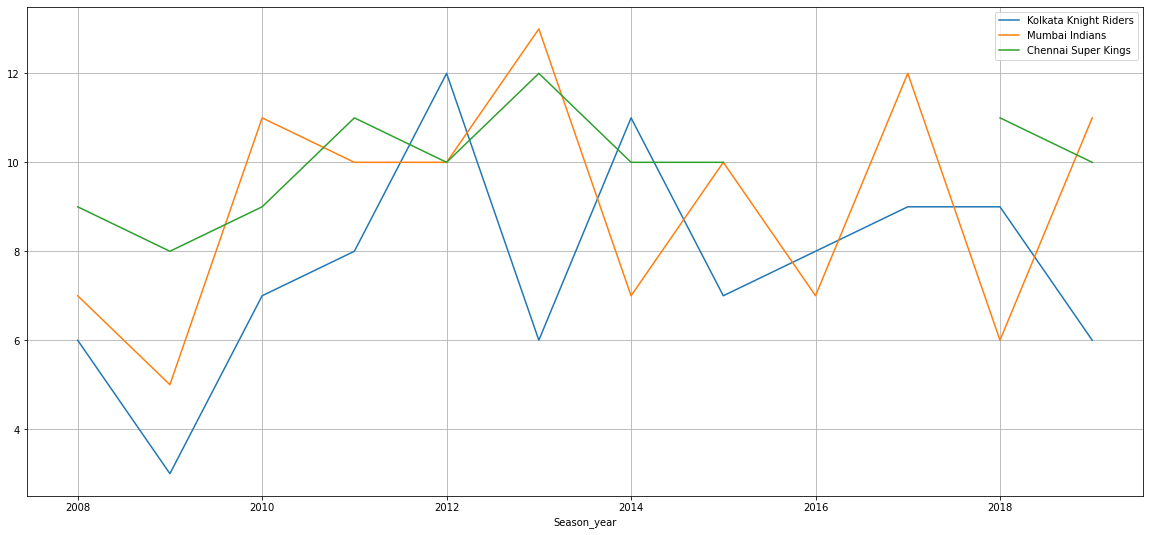

In [ ]:
# sns.factorplot(x="Season_year", y=["Kolkata Knight Riders", "Mumbai Indians", "Chennai Super Kings"], data=matches_df_win_2)
matches_df_win_2.plot(x='Season_year', y=["Kolkata Knight Riders", "Mumbai Indians", "Chennai Super Kings"], figsize=(20,9), grid=True)

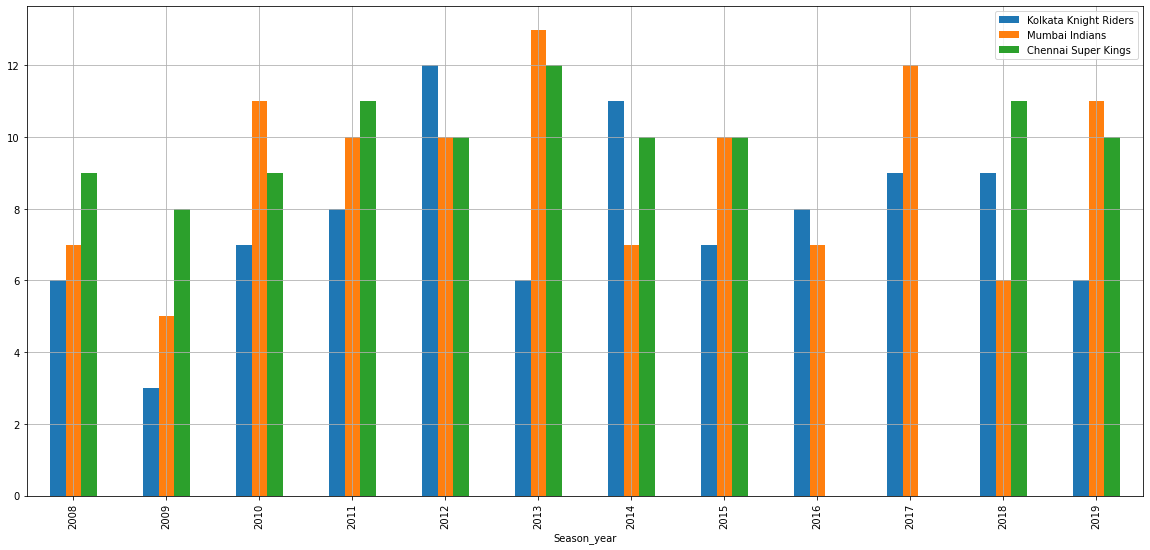

In [ ]:
matches_df_win_2.plot(x='Season_year', y=["Kolkata Knight Riders", "Mumbai Indians", "Chennai Super Kings"], figsize=(20,9), grid=True, kind='bar')

##Observation: Chennai Super Kings and Mumbai Indians has a head to head comparision.

#Conclusions


*   Chris Gayle is the most valuable player in IPL
*   Mumbai Indians is the most successful team in IPL followed by Chennai Super Kings
*   Toss Winning does not help much with match winning.
*   Maximum number of IPL matches were held in Mumbai
*   Mumbai Indians won the toss maximum times.
*   Shikhar Dhawan scored maximum fours (526 Fours).
*   Chris Gayle scored maximum sixes (327 Sixes).
*   Mumbai Indians played maximum number of matches in Mumbai.
*   Maximum number of IPL matches were held in 2013 (76 matches).
